# Практическая работа 3: Анализ фермерских хозяйств (вариант 21)

## Задание 30
**Цель:** Рассчитать прогнозируемый доход для каждого фермерского хозяйства:
- **Файл 1 (CSV):** Фермерские хозяйства: farm_id, farm_name, crop_type
- **Файл 2 (Excel):** Урожай: farm_id, harvest_tonnes
- **Файл 3 (JSON):** Цены на рынке: crop_type, price_per_tonne

## Библиотеки и подключения


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✓ Библиотеки загружены")


✓ Библиотеки загружены


## 1. Загрузка данных из различных источников


In [3]:
# Загрузка данных о фермерских хозяйствах (CSV)
df_farms = pd.read_csv('../data/fermers.csv')
print("Данные о фермерских хозяйствах (CSV):")
print(f"Форма данных: {df_farms.shape}")
print(df_farms.head())
print("\n" + "="*50 + "\n")


Данные о фермерских хозяйствах (CSV):
Форма данных: (100, 3)
  farm_id                   farm_name     crop_type
0    F001      Хозяйство 'Кукуруза'-1      Кукуруза
1    F002       Хозяйство 'Пшеница'-2       Пшеница
2    F003  Хозяйство 'Подсолнечник'-3  Подсолнечник
3    F004        Хозяйство 'Свекла'-4        Свекла
4    F005        Хозяйство 'Свекла'-5        Свекла




In [5]:
# Загрузка данных об урожае (Excel)
df_harvest = pd.read_excel('../data/urozhay.xlsx')
print("Данные об урожае (Excel):")
print(f"Форма данных: {df_harvest.shape}")
print(df_harvest.head())
print("\n" + "="*50 + "\n")


Данные об урожае (Excel):
Форма данных: (100, 2)
  farm_id  harvest_tonnes
0    F001            55.0
1    F002            58.5
2    F003            34.6
3    F004           319.7
4    F005           231.2




In [6]:
# Загрузка данных о ценах на рынке (JSON)
with open('../data/ceny.json', 'r', encoding='utf-8') as f:
    prices_data = json.load(f)

df_prices = pd.DataFrame(prices_data)
print("Данные о ценах на рынке (JSON):")
print(f"Форма данных: {df_prices.shape}")
print(df_prices.head())
print("\n" + "="*50 + "\n")


Данные о ценах на рынке (JSON):
Форма данных: (8, 2)
      crop_type  price_per_tonne
0       Пшеница         12188.58
1      Кукуруза         13818.46
2     Картофель          9886.14
3        Свекла          9542.85
4  Подсолнечник         34075.66




## 2. Консолидация данных и расчет прогнозируемого дохода


In [7]:
# Шаг 1: Объединяем фермы и урожай по farm_id
df_farms_harvest = pd.merge(df_farms, df_harvest, on='farm_id', how='inner')

# Шаг 2: Объединяем с ценами по crop_type
df_consolidated = pd.merge(df_farms_harvest, df_prices, on='crop_type', how='left')

# Расчёт прогнозируемого дохода
df_consolidated['predicted_income'] = df_consolidated['harvest_tonnes'] * df_consolidated['price_per_tonne']

print("Консолидированные данные:")
print(f"Форма данных: {df_consolidated.shape}")
print(df_consolidated[['farm_name', 'crop_type', 'harvest_tonnes', 'price_per_tonne', 'predicted_income']].head())

# Итоговая сводка по каждому хозяйству
income_summary = df_consolidated[['farm_id', 'farm_name', 'crop_type', 'predicted_income']].copy()
income_summary = income_summary.sort_values('predicted_income', ascending=False).reset_index(drop=True)

print("\n" + "="*60)
print("ПРОГНОЗИРУЕМЫЙ ДОХОД ПО ФЕРМЕРСКИМ ХОЗЯЙСТВАМ")
print("="*60)
print(income_summary.head(10))

Консолидированные данные:
Форма данных: (100, 6)
                    farm_name     crop_type  harvest_tonnes  price_per_tonne  \
0      Хозяйство 'Кукуруза'-1      Кукуруза            55.0         13818.46   
1       Хозяйство 'Пшеница'-2       Пшеница            58.5         12188.58   
2  Хозяйство 'Подсолнечник'-3  Подсолнечник            34.6         34075.66   
3        Хозяйство 'Свекла'-4        Свекла           319.7          9542.85   
4        Хозяйство 'Свекла'-5        Свекла           231.2          9542.85   

   predicted_income  
0        760015.300  
1        713031.930  
2       1179017.836  
3       3050849.145  
4       2206306.920  

ПРОГНОЗИРУЕМЫЙ ДОХОД ПО ФЕРМЕРСКИМ ХОЗЯЙСТВАМ
  farm_id                 farm_name  crop_type  predicted_income
0    F070     Хозяйство 'Свекла'-70     Свекла       3792328.590
1    F013     Хозяйство 'Свекла'-13     Свекла       3497454.525
2    F076     Хозяйство 'Свекла'-76     Свекла       3299917.530
3    F046     Хозяйство 'Свекла

## 3. Визуализация результатов


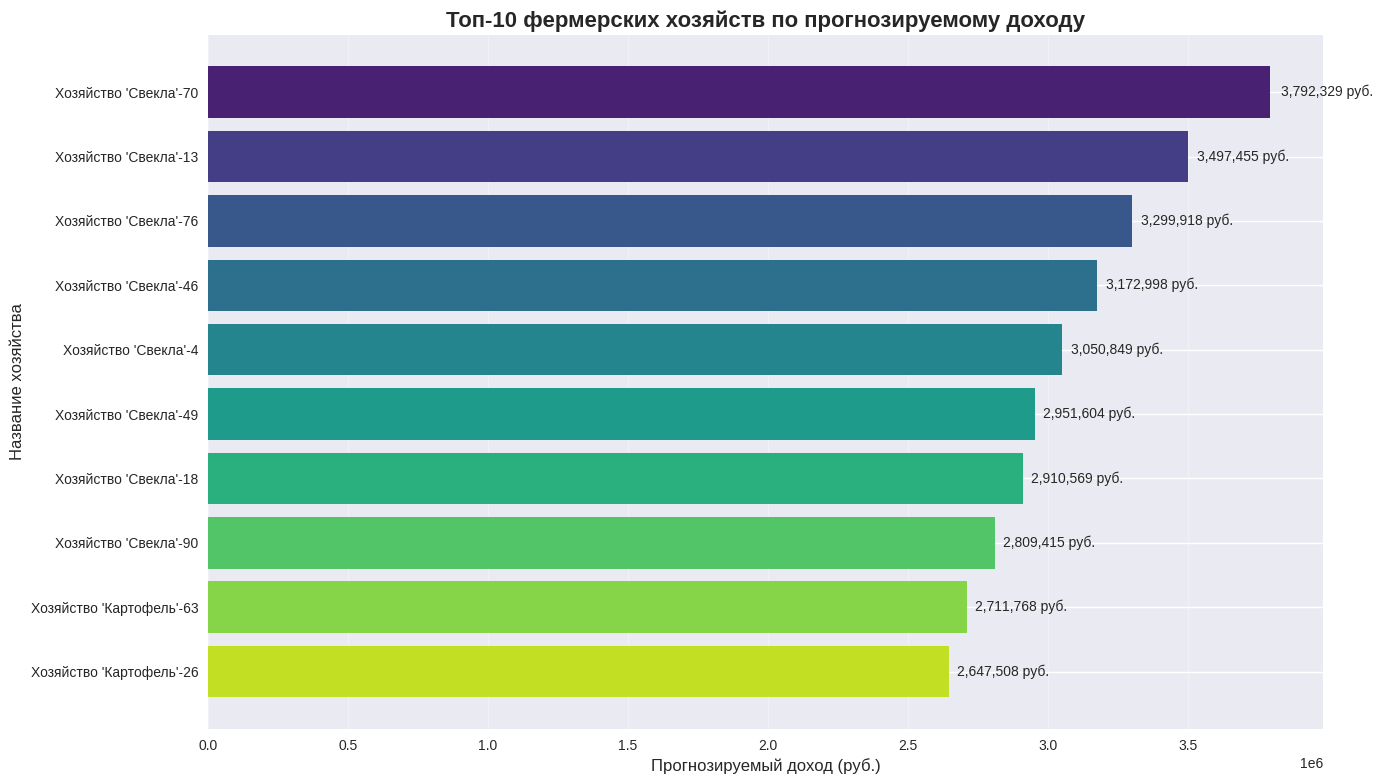

In [8]:
# График 1: Топ-10 хозяйств по доходу
top_10 = income_summary.head(10)

plt.figure(figsize=(14, 8))
bars = plt.barh(top_10['farm_name'], top_10['predicted_income'], color=sns.color_palette("viridis", len(top_10)))
plt.gca().invert_yaxis()  # Самый высокий доход сверху
plt.title('Топ-10 фермерских хозяйств по прогнозируемому доходу', fontsize=16, fontweight='bold')
plt.xlabel('Прогнозируемый доход (руб.)', fontsize=12)
plt.ylabel('Название хозяйства', fontsize=12)

# Добавление значений на столбцы
for bar in bars:
    width = bar.get_width()
    plt.text(width + width * 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f} руб.', va='center', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

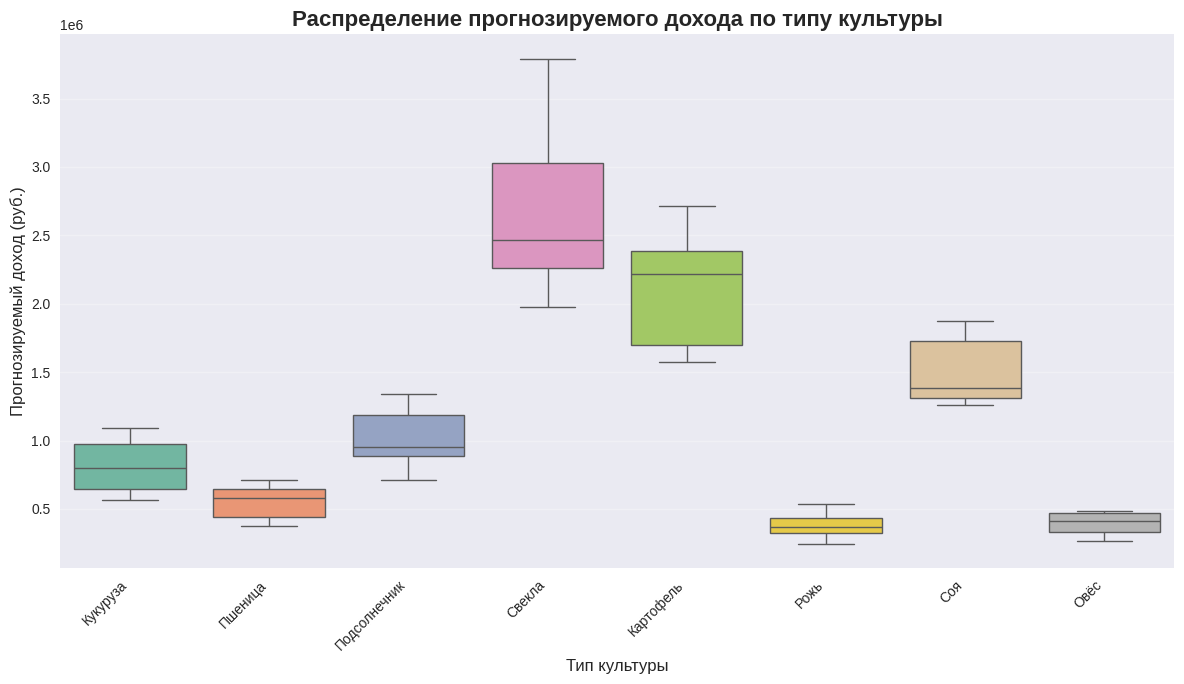

In [9]:
# График 2: Доход по типу культуры (boxplot)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_consolidated, x='crop_type', y='predicted_income', palette='Set2')
plt.title('Распределение прогнозируемого дохода по типу культуры', fontsize=16, fontweight='bold')
plt.xlabel('Тип культуры', fontsize=12)
plt.ylabel('Прогнозируемый доход (руб.)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

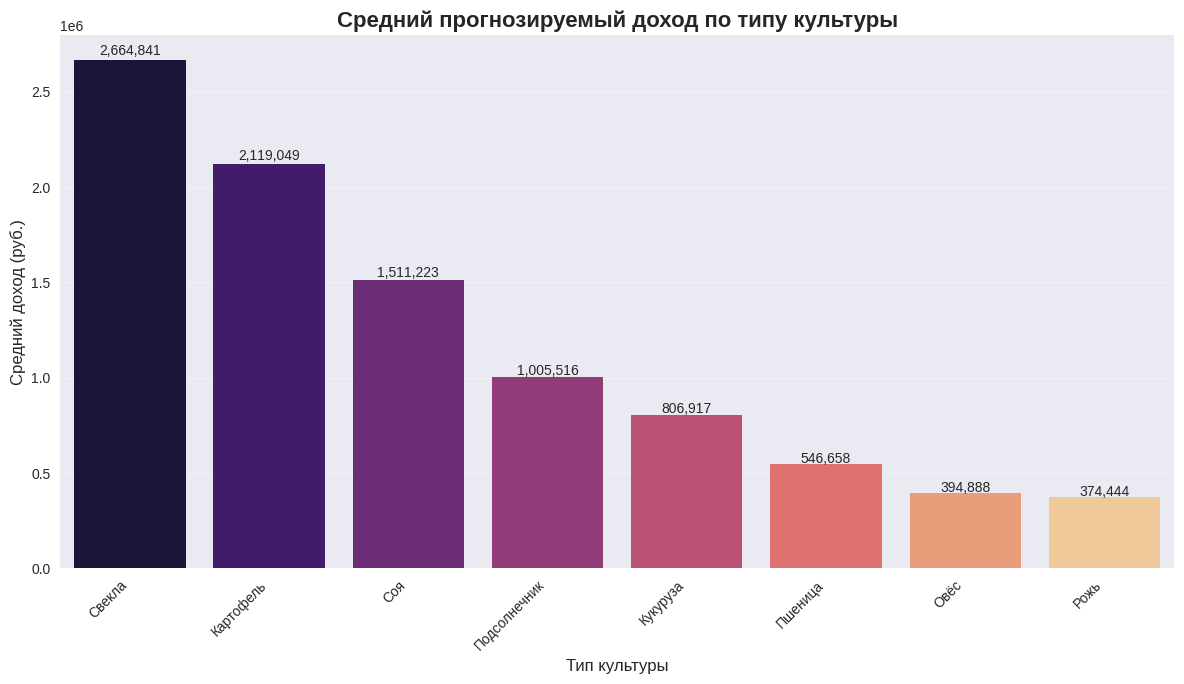

In [10]:
# График 3: Средний доход по культурам
avg_income_by_crop = df_consolidated.groupby('crop_type')['predicted_income'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_income_by_crop.index, y=avg_income_by_crop.values, palette='magma')
plt.title('Средний прогнозируемый доход по типу культуры', fontsize=16, fontweight='bold')
plt.xlabel('Тип культуры', fontsize=12)
plt.ylabel('Средний доход (руб.)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(avg_income_by_crop.values):
    plt.text(i, v + v * 0.01, f'{v:,.0f}', ha='center', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Выводы и сохранение результатов


In [12]:
print("ОСНОВНЫЕ ВЫВОДЫ АНАЛИЗА")
print("="*50)

total_income = df_consolidated['predicted_income'].sum()
top_farm = income_summary.iloc[0]
avg_income = df_consolidated['predicted_income'].mean()

print(f"1. Общий прогнозируемый доход по всем хозяйствам: {total_income:,.0f} руб.")
print(f"2. Лидер по доходу: {top_farm['farm_name']} — {top_farm['predicted_income']:,.0f} руб.")
print(f"3. Средний доход на одно хозяйство: {avg_income:,.0f} руб.")
print(f"4. Всего проанализировано хозяйств: {len(df_consolidated)}")

# Топ-3 по культуре
print("\n5. Самая прибыльная культура (по среднему доходу):")
best_crop = avg_income_by_crop.index[0]
print(f"   → {best_crop} ({avg_income_by_crop.iloc[0]:,.0f} руб. в среднем)")

# Сохранение результатов
df_consolidated.to_csv('../data/consolidated_farm_data.csv', index=False, encoding='utf-8')
income_summary.to_csv('../data/farm_income_summary.csv', index=False, encoding='utf-8')

print("\n" + "="*50)
print("✓ Результаты сохранены в папке 'data/'")
print("✓ Анализ завершён успешно!")

ОСНОВНЫЕ ВЫВОДЫ АНАЛИЗА
1. Общий прогнозируемый доход по всем хозяйствам: 122,712,016 руб.
2. Лидер по доходу: Хозяйство 'Свекла'-70 — 3,792,329 руб.
3. Средний доход на одно хозяйство: 1,227,120 руб.
4. Всего проанализировано хозяйств: 100

5. Самая прибыльная культура (по среднему доходу):
   → Свекла (2,664,841 руб. в среднем)

✓ Результаты сохранены в папке 'data/'
✓ Анализ завершён успешно!
